# Decomposed_Learning_Results (CL* Algorithm)


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# don't run this if you use google colab 
df =  pd.read_csv('data/Results.csv',index_col=False)

## Clean data

In [113]:
def round_data(data):
  return round(data, 3)

In [114]:
df = df[(df["STATES"]<=10000) & (df["STATES"]>=100) ]

In [115]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
df

,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,LSTAR_EQs,...,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CLSTAR_MQs,CACHE
0,Real-Tests/data/Reals_With_4_Components1.txt,5536,15,56538419,2238882,114671,766,56653090,2239648,6,...,881687,3509024,23377,61669153,905064,169,4,14,1284212,True
1,Real-Tests/data/Reals_With_4_Components3.txt,2084,12,18693378,463848,110200,738,18803578,464586,5,...,868393,1992937,13292,63862910,881685,119,2,12,1261232,True
2,Real-Tests/data/Reals_With_4_Components5.txt,2084,12,13253020,412236,143152,949,13396172,413185,5,...,888472,1938469,12921,64204072,901393,119,2,12,1295194,True
3,Real-Tests/data/Reals_With_5_Components1.txt,192,15,9349869,141261,76459,508,9426328,141769,4,...,136555,2352538,15633,11936109,152188,138,3,13,161978,True
4,Real-Tests/data/Reals_With_5_Components4.txt,692,15,11967495,213885,76588,515,12044083,214400,3,...,174780,2495254,16650,16179643,191430,140,3,13,221976,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Real-Tests/data/Reals_With_8_Components6.txt,8304,23,44122514,2177726,77481,512,44199995,2178238,3,...,123663,6107893,40683,14659662,164346,309,5,20,166623,True
97,Real-Tests/data/Reals_With_8_Components7.txt,2304,23,27368959,678326,74392,503,27443351,678829,3,...,202365,7391714,49168,22774852,251533,343,6,21,239681,True
98,Real-Tests/data/Reals_With_8_Components9.txt,768,20,2048020,307220,74388,500,2122408,307720,1,...,547,4521317,30112,4524251,30659,206,8,14,2717,True
99,Real-Tests/data/Reals_With_9_Components6.txt,2880,25,13997904,764548,74878,502,14072782,765050,2,...,37582,7532062,50161,10017027,87743,332,7,19,49235,True


In [116]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

In [117]:
# @title Bins
bins = [100, 1090, 2080, 3070, 4060, 5050, 6040, 7030, 8020, 9010, 10000]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [118]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   35
Min:     156
Max:     8336
mean:    2628.5714285714284
std:     2551.7261779812816


C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\2303827582.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\2303827582.py:4: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\2303827582.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current be

In [119]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [120]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))



100 - 1090
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=156, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=23251, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=23251, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3155751, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3155751, statistic_sign=-1)
ShapiroResult(statistic=0.8403948594408243, pvalue=4.6871510943892896e-09)
ShapiroResult(statistic=0.7057127871399573, pvalue=6.249777225841912e-13)
ShapiroResult(statistic=0.7057127871399573, pvalue=6.249777225841912e-13)
ShapiroResult(statistic=0.7209591256016247, pvalue=1.4585750658380191e-12)
ShapiroResult(statistic=0.7209591256016247, pvalue=1.4585750658380191e-12)
1090 - 2080
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=156, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=23251, statistic_sign=-1)
KstestRes

In [121]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    SCLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    SCLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    SCLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    SCLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    SCLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    SCLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    SCLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    SCLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    SCLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    SCLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    SCLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    SCLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    SCLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    SCLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    SCLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    SCLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    SCLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()

df3

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\1539619015.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df["STATES"],bins))


,STATES,inputs,LSTAR_total_sym_median,LSTAR_total_sym_mean,LSTAR_total_sym_std,LSTAR_total_reset_median,LSTAR_total_reset_mean,LSTAR_total_reset_std,LSTAR_mq_sym_mean,LSTAR_mq_sym_std,...,SCLSTAR_mq_sym_std,SCLSTAR_mq_reset_mean,SCLSTAR_mq_reset_std,SCLSTAR_eq_sym_mean,SCLSTAR_eq_sym_std,SCLSTAR_eq_reset_mean,SCLSTAR_eq_reset_std,SCLSTAR_eqs,SCLSTAR_components,SCLSTAR_rounds
0,"(100, 1090]",16.0,2837935.0,3.247338e+06,3.023237e+06,91040.5,1.477481e+05,123011.746743,2763090.0,3.022627e+06,...,4.430832e+06,22544.5,57578.279628,3317205.0,1.302668e+06,22103.5,8675.874178,147.0,5.0,13.0
1,"(1090, 2080]",18.0,11122597.0,1.343750e+07,6.140161e+06,633719.0,6.213150e+05,241771.179352,11044087.0,6.139538e+06,...,5.904486e+06,139668.0,73065.100846,3324521.0,3.033963e+06,22134.0,20211.785578,177.5,4.0,14.0
2,"(2080, 3070]",18.0,15956640.0,1.852282e+07,9.157889e+06,678829.0,6.925196e+05,220976.501689,15850438.0,9.140104e+06,...,3.629399e+07,320079.0,505151.244459,4223037.0,3.037421e+06,28117.0,20239.016326,188.0,5.0,14.0
3,"(3070, 4060]",20.0,26107118.0,2.790202e+07,3.674003e+06,1535277.0,1.557766e+06,41239.547734,26030364.0,3.675136e+06,...,1.662418e+06,114525.0,17117.950783,5576172.0,3.514812e+05,37171.0,2373.571219,230.0,6.0,16.0
4,"(4060, 5050]",22.0,28898540.0,3.380480e+07,1.982570e+07,1015179.5,1.204725e+06,285271.454187,28814605.5,1.980681e+07,...,5.380454e+07,154498.0,824155.877649,5167961.0,2.554435e+06,34408.5,17032.613558,283.0,5.0,18.5
5,"(5050, 6040]",28.0,62025925.0,6.142708e+07,1.300306e+07,2693282.0,2.664502e+06,251783.072184,61948106.0,1.300598e+07,...,2.161779e+07,138254.0,338015.177319,8731036.0,2.357788e+06,58207.0,15726.913454,403.0,7.0,21.0
6,"(6040, 7030]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(7030, 8020]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(8020, 9010]",18.0,57215896.5,6.286178e+07,2.376211e+07,2340618.0,2.419261e+06,449144.489598,57129512.0,2.374224e+07,...,4.381811e+07,932105.0,597807.762134,4255118.5,1.440752e+06,28280.5,9606.930947,248.5,4.0,17.5
9,"(9010, 10000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Progress
df3['SCLSTAR_TOTAL_SYM_progress'] = (1 - (df3['SCLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['SCLSTAR_TOTAL_RST_progress'] = (1 - (df3['SCLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['SCLSTAR_MQ_SYM_progress'] = (1 - (df3['SCLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['SCLSTAR_MQ_RST_progress'] = (1 - (df3['SCLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['SCLSTAR_EQ_SYM_progress'] = (1 - (df3['SCLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['SCLSTAR_EQ_RST_progress'] = (1 - (df3['SCLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [123]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'SCLSTAR_TOTAL_SYM_pvalue':[],
'SCLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue
  pvalue_info['STATES'].append(data_range)
  pvalue_info['SCLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['SCLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')

In [124]:
final_df['SCLSTAR_TOTAL_SYM_pvalue']

0    1.000000
1    0.533833
2    0.999803
3    0.023047
4    0.847573
5    0.018652
6         NaN
7         NaN
8    0.624073
9         NaN
Name: SCLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [125]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'SCLSTAR_total_sym_median',
       'SCLSTAR_total_sym_mean', 'SCLSTAR_total_sym_std',
       'SCLSTAR_total_reset_median', 'SCLSTAR_total_reset_mean',
       'SCLSTAR_total_reset_std', 'SCLSTAR_mq_sym_mean', 'SCLSTAR_mq_sym_std',
       'SCLSTAR_mq_reset_mean', 'SCLSTAR_mq_reset_std', 'SCLSTAR_eq_sym_mean',
       'SCLSTAR_eq_sym_std', 'SCLSTAR_eq_reset_mean', 'SCLSTAR_eq_reset_std',
       'SCLSTAR_eqs', 'SCLSTAR_components', 'SCLSTAR_rounds',
       'SCLSTAR_TOTAL_SYM_progress', 'SCLSTAR_TOTAL_RST_progress',
       'SCLSTAR_MQ_SYM_progress', 'SCLSTAR_MQ_RST_progress',
       'SCLSTAR_EQ_SYM_p

## Tables 

In [126]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "SCLSTAR_total_reset_mean", "SCLSTAR_total_reset_std", "SCLSTAR_TOTAL_RST_progress" ,"SCLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,SCLSTAR_total_reset_mean,SCLSTAR_total_reset_std,SCLSTAR_TOTAL_RST_progress,SCLSTAR_TOTAL_RST_pvalue
0,"(100, 1090]",1.477481e+05,123011.746743,71079.406250,53405.485842,51.891480,1.493260e-03
1,"(1090, 2080]",6.213150e+05,241771.179352,148865.900000,54846.575152,76.040189,2.573886e-04
2,"(2080, 3070]",6.925196e+05,220976.501689,550408.680000,487517.688284,20.520856,1.382901e-01
3,"(3070, 4060]",1.557766e+06,41239.547734,146397.333333,19230.949699,90.602095,3.009114e-04
4,"(4060, 5050]",1.204725e+06,285271.454187,693551.500000,810595.189354,42.430701,3.197567e-02
5,"(5050, 6040]",2.664502e+06,251783.072184,329947.000000,322391.524084,87.616935,3.791373e-04
6,"(6040, 7030]",NaN,NaN,NaN,NaN,NaN,NaN
7,"(7030, 8020]",NaN,NaN,NaN,NaN,NaN,NaN
8,"(8020, 9010]",2.419261e+06,449144.489598,897201.714286,591272.267290,62.914219,3.060805e-07
9,"(9010, 10000]",NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "SCLSTAR_total_sym_mean", "SCLSTAR_total_sym_std", "SCLSTAR_TOTAL_SYM_progress" ,"SCLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,SCLSTAR_total_sym_mean,SCLSTAR_total_sym_std,SCLSTAR_TOTAL_SYM_progress,SCLSTAR_TOTAL_SYM_pvalue
0,"(100, 1090]",3.247338e+06,3.023237e+06,5895660.5,3.886480e+06,-81.553633,1.000000
1,"(1090, 2080]",1.343750e+07,6.140161e+06,12642997.0,3.663097e+06,5.912551,0.533833
2,"(2080, 3070]",1.852282e+07,9.157889e+06,34118417.0,3.375716e+07,-84.196659,0.999803
3,"(3070, 4060]",2.790202e+07,3.674003e+06,14004468.0,1.950446e+06,49.808405,0.023047
4,"(4060, 5050]",3.380480e+07,1.982570e+07,18555889.5,5.181301e+07,45.108716,0.847573
5,"(5050, 6040]",6.142708e+07,1.300306e+07,19178446.0,1.927652e+07,68.778515,0.018652
6,"(6040, 7030]",NaN,NaN,NaN,NaN,NaN,NaN
7,"(7030, 8020]",NaN,NaN,NaN,NaN,NaN,NaN
8,"(8020, 9010]",6.286178e+07,2.376211e+07,68824912.5,4.288038e+07,-9.486110,0.624073
9,"(9010, 10000]",NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [129]:
sns.set(rc={'figure.figsize':(15,6)})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\2104504040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\2104504040.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


      state_range method  total number of symbols
0    (5050, 6040]     L*                 56653090
1    (5050, 6040]   SCL*                 61669153
2    (2080, 3070]     L*                 18803578
3    (2080, 3070]   SCL*                 63862910
4    (2080, 3070]     L*                 13396172
..            ...    ...                      ...
197   (100, 1090]   SCL*                  4524251
198  (2080, 3070]     L*                 14072782
199  (2080, 3070]   SCL*                 10017027
200  (8020, 9010]     L*                 61556462
201  (8020, 9010]   SCL*                147362997

[202 rows x 3 columns]


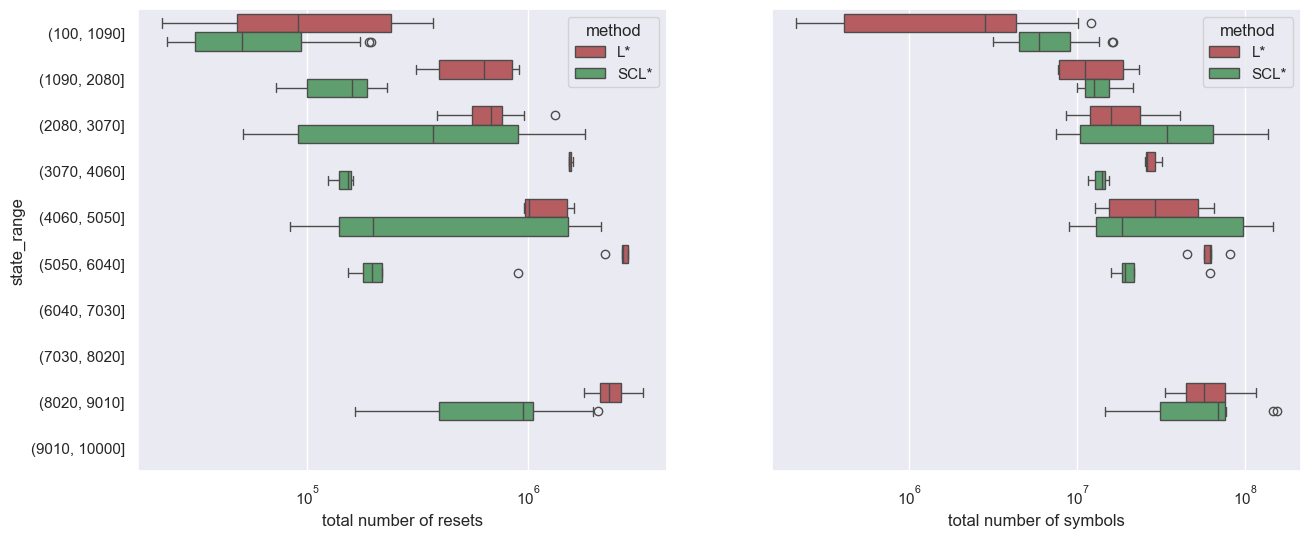

In [130]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'SCL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0], palette=['r', 'g']).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'SCL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'SCL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})
print(d1)
g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1], palette=['r', 'g'])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\127336932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\127336932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykerne

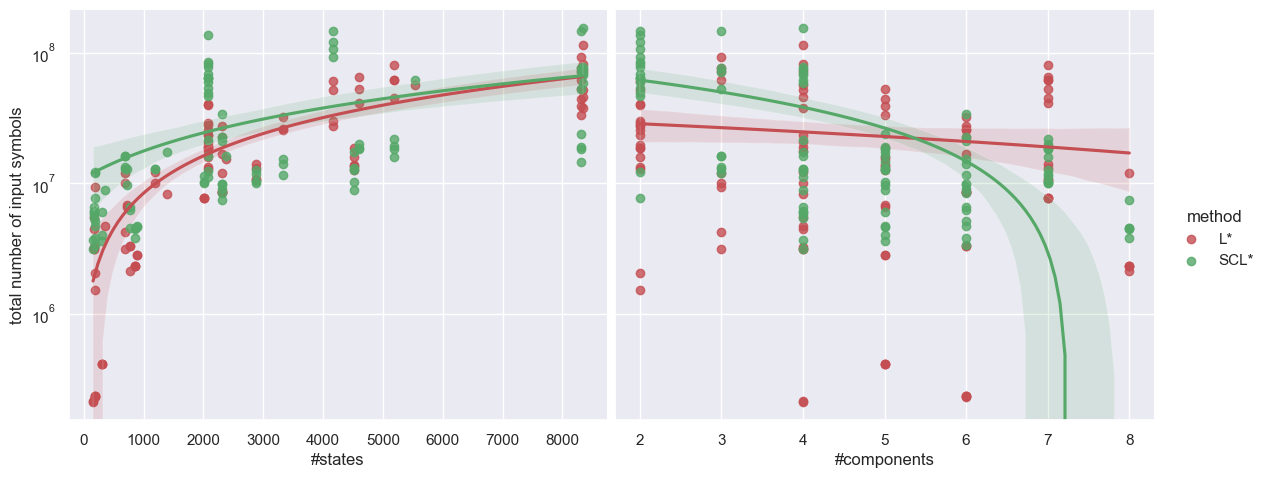

In [131]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\3957529785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\3957529785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

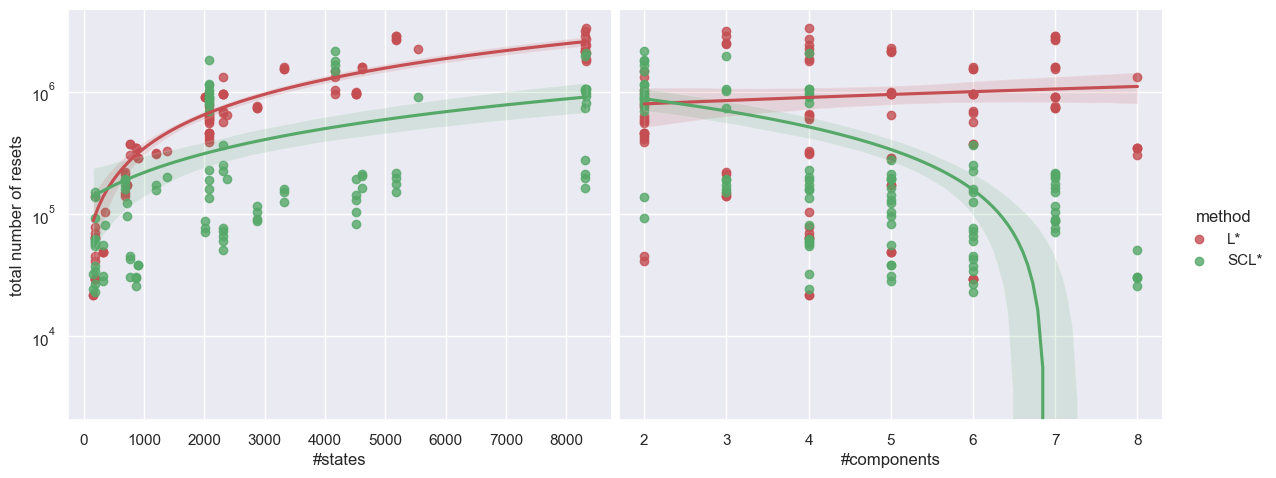

In [132]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\1587808325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\1587808325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\1587808325.py:4: 

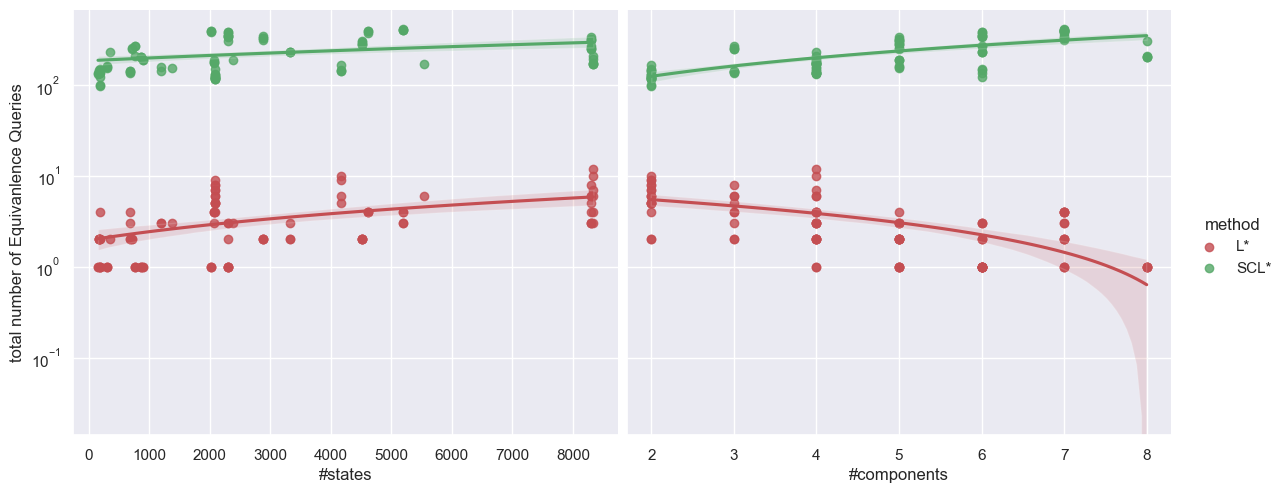

In [133]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_EQs', 'CLSTAR_EQs']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of Equivanlence Queries"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Equivanlence Queries"],
             hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\4161053692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\4161053692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_9500\4161053692.py:3: 

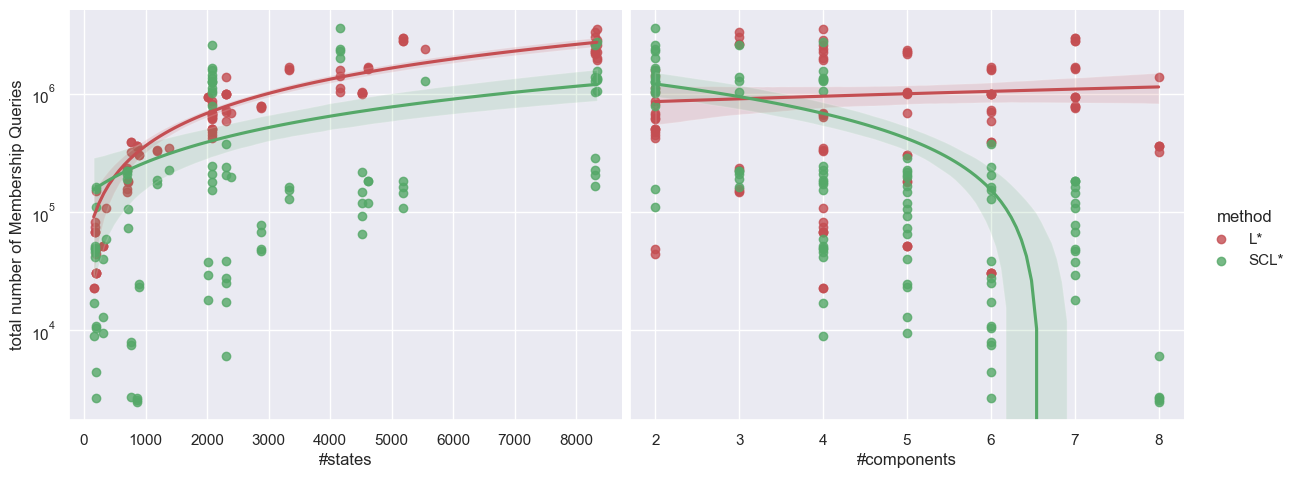

In [134]:
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_MQs', 'CLSTAR_MQs']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of Membership Queries"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Membership Queries"],
             hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
plt.yscale('log')